# One Dimensional Zero Temperature Random Field Ising Model for Magentization of Ferromagnetic Material

Consider a 1-dimensional square lattice with Ising spins (±1) at each site and the system has open boundary conditions. The net field at each site $i$ is $H_{i}^{eff}$ which is given by

\begin{equation} H_{i}^{eff} = J \sum_{j}s_{j} + h_{i} + H. \end{equation}

The local random field is denoted by $h_{i}$ and the applied external field is denoted by $H$. The interaction between spins of neighboring sites is expressed as $J \sum_{j}s_{j}$  and the units are chosen such that $J$ = 1. The random field is defined in terms of the mean and standard deviation as follows:

$$\rho(h) = \frac{1}{R \sqrt{2\pi}} e^{-\frac{-h^2}{2R^2}}.$$

The standard deviation $R$ is what ultimately controls the field at each site. This model includes no thermal changes and each spin will flip only when its local field $H_{i}^{eff} \geq 0$. The spin flip is triggered by two mechanisms:
- A flip can be triggered when a neighbouring spin flips (being a part of an avalanche).
- A flip can be triggered when the external field H is increased. 

The algorithm of the code is as follows:
1. Initialization:
    - Set all spins to be pointed down.
2. External Magnetic Field Increase:
    - Increase the external magnetic field.
3. Spin Flipping:
    - Using Eqn. (1), calculate the net magnetic field at each site.
    - For each site, if the effective magnetic field, is greater than or equal to zero ($H_{i}^{eff}\geq 0$), flip the spin at that site.
4. Field Recalculation and Neighbor Check:
    - Recalculate the magnetic field at each site, considering the newly flipped spins.
    - For each flipped spin, examine its neighboring sites.
    - If any neighboring spin is affected by the flipping and $H_{i}^{eff}\geq 0$ flip that spin as well.
5. Repeat Flipping:
    - Repeat steps 3 and 4 until no more spins can be flipped.
6. External Field Increment:
    - Increase the external magnetic field.
7. Repeat Steps 2 to 6:
    - Repeat steps 2 to 6 until all spins have flipped.
This formalization outlines the steps to be taken to simulate the flipping of spins in response to an external magnetic field, iteratively updating the system until all spins have aligned with the field.

The following code is designed to give the relation between magnetization vs the external magnetic field to study: 
1. The effect of changing standard deviation of random field on the magnetization.
2. The effect on magnetization when different bounded distributions are used for generating random field.
3. Finding the critical standard deviation for which the avalanche transitions from infinite to finite.

In [1]:
#Importing all the functions
import numpy as np
import matplotlib.pyplot as plt
import timeit
start_time = timeit.default_timer()

In [2]:
#Defining important functions
def indices_greater_than(arr): #This function finds the index of the positive values
    return np.where(arr > 0)[0]

def sum_over_neighbors(input): #This function performs the summation of spins over neighbors
    Neighbor = []
    for j in range(N):
        left_neighbor = input[j - 1] if j > 0 else 0 #This step finds the left neighbor
        right_neighbor = input[j + 1] if j < N - 1 else 0 #This step finds the right neighbor
        Neighbor.append(left_neighbor + right_neighbor) #Sum of neighbors
        neighbor = np.array(Neighbor)
    return neighbor

Defining the length of lattice or number of spins

In [3]:
#Length of the Grid (N)
N = 1000

Pointing all spins of the lattice down

In [4]:
#Generating an array with all elements -1
initial_condition = [-1] * N 
initial_condition = np.array(initial_condition)

Generating the random field for each site using gaussian distribution

In [5]:
h = 0 #Mean of the distribution
R = 2.1 #Standard Deviation of the distribution
random_field = np.random.normal(h, R, N) #This is the Random Field at each lattice Site

Generating the External Magnetic field that will be applied.
The number bins/data points can be changed by altering the value of interval

In [6]:
External_field = np.arange(-10, 10, 0.01)

Steps of implementation of the aforementioned algorithim
1. Step 1: Initial Calculation and Spin Flipping
    - Apply an external field to the system.
    - Calculate neighbor interactions and determine the net field at each site.
    - Flip spins with a local non-negative field.
    - Generate an output array based on the results of this step.
2. Step 2: Recalculation and Spin Flipping
    - Recalculate neighbor interactions and fields at each site while maintaining the external field constant.
    - Flip spins with a local non-negative field.
    - Generate a new output array based on the results of this step.
3. Step 3: Further Recalculation and Spin Flipping
    - Recalculate neighbor interactions and fields using the output array from Step 2.
    - Flip spins with a local non-negative field.
    - Generate a new output array based on the results of this step.
4. Iterative Looping of Steps 2 and 3
    - Repeat Steps 2 and 3 in a loop until the outputs arrays of both steps are equal.
    - Equality indicates that no further spin flipping will occur for the given external field.
5. Application of New External Field
    - Once the loop concludes, apply a new external field to the final output of Steps 2 and 3.
6. Continuation of the Process
    - Repeat the entire process until all external fields have been applied to the system.
These nested loops make code run slow as the number of lattice sites are increased.

In [7]:
Field_at_sites = []
second_flip =[]
second_flip = np.array(second_flip)
M = []
for ext_field in External_field: #The loop will continue unitl all external field are applied to the system
    Field_at_sites = ext_field + sum_over_neighbors(initial_condition) + random_field #Field at each site
    spin_flip_index = indices_greater_than(Field_at_sites) #Finding Index of spins which have local field ≥ 0
    initial_condition[spin_flip_index] = 1 #Flipping the spins with non-negative field
    while True: #The loop will continue till stability is achieved
        initial_condition.all() != second_flip.all() #Condition for non-stable system
        Field_at_sites = ext_field + sum_over_neighbors(initial_condition) + random_field
        spin_flip_index = indices_greater_than(Field_at_sites)
        initial_condition[spin_flip_index] = 1
        neighbor_post = sum_over_neighbors(initial_condition)
        Field_at_sites = ext_field + neighbor_post + random_field
        spin_flip_index = indices_greater_than(Field_at_sites)
        second_flip = np.copy(initial_condition)
        second_flip[spin_flip_index] = 1
        if initial_condition.all() == second_flip.all(): #Condition for stable system
            M.append(np.sum(second_flip)/N)
            break

Plotting External Field vs Magnetization

Time taken by code to run: 126.05892790000053


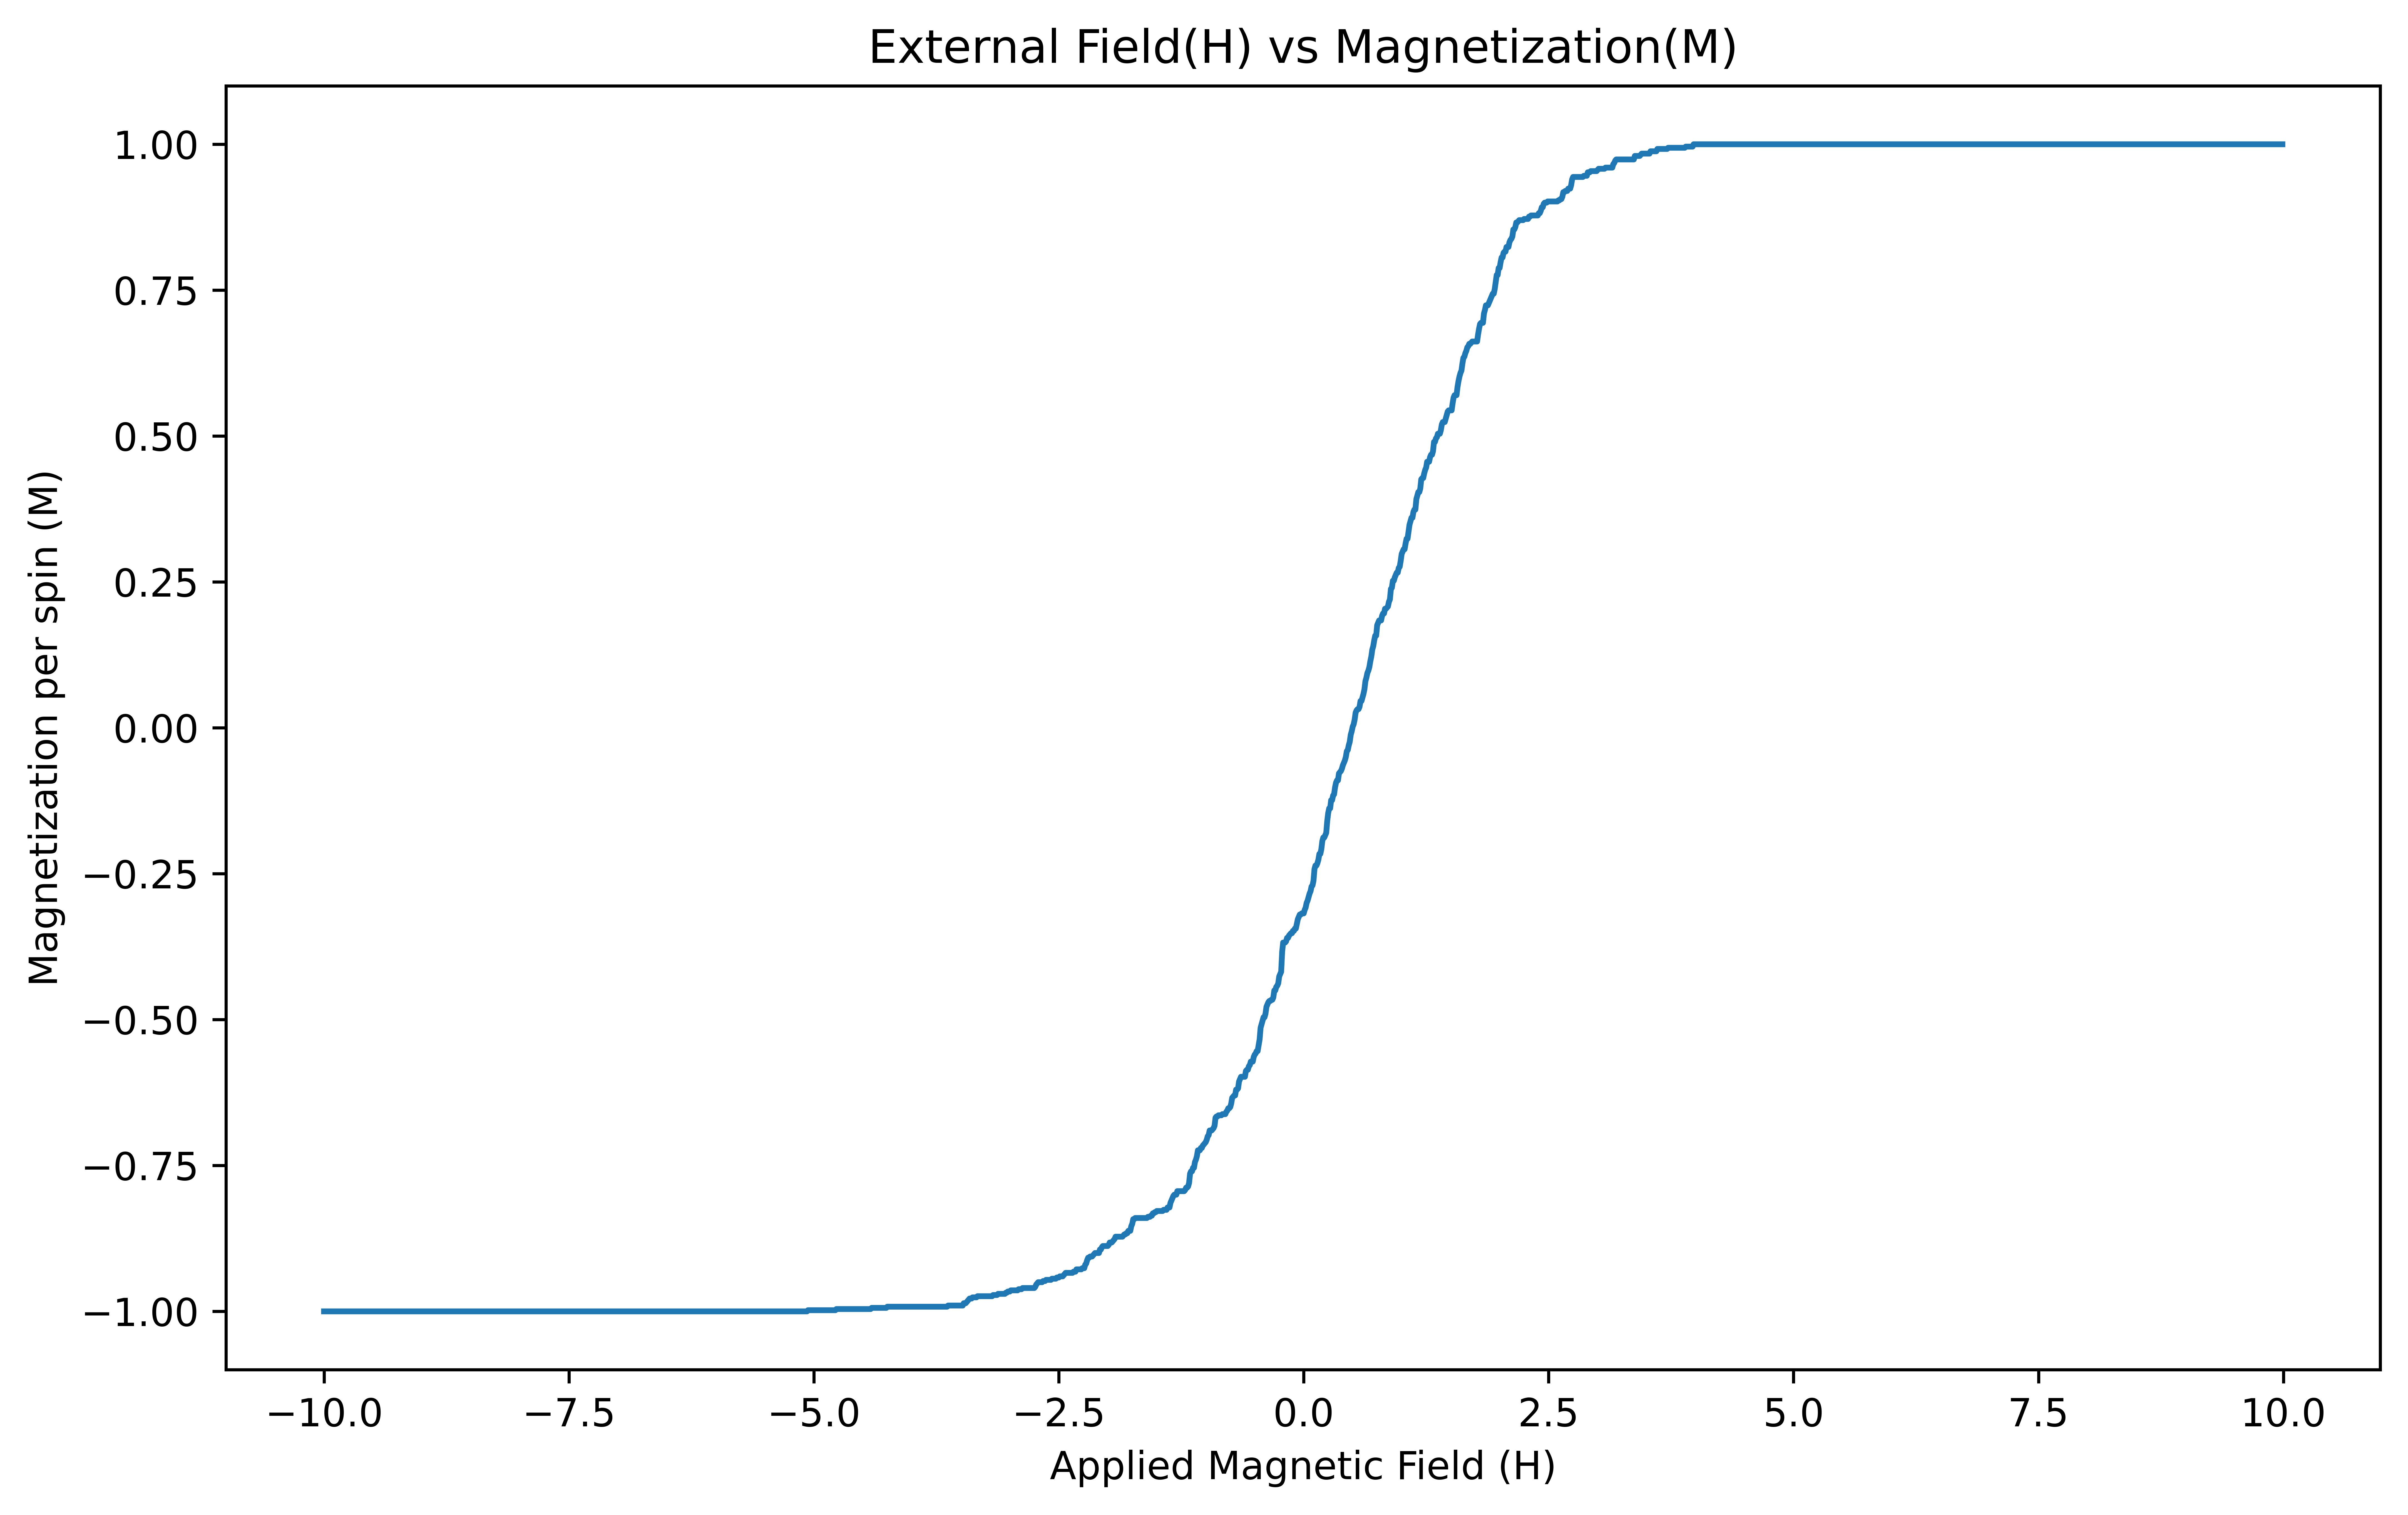

In [8]:
M = np.array(M)
H = External_field
plt.figure(figsize=(10, 6),dpi = 1000)
plt.plot(H, M) 
plt.xlabel('Applied Magnetic Field (H)') 
plt.ylabel('Magnetization per spin (M)')
plt.title('External Field(H) vs Magnetization(M)')
elapsed = timeit.default_timer() - start_time
print ("Time taken by code to run:", elapsed)